# Grad-CAM Inscribed DCA Notebook

This notebook is used to prove that the baseline network is using the DCA to predict the class.

## Imports

In [1]:
# append custom system path for custom modules folder in directory if not already
import sys
if  '../../Modules' not in sys.path:
    sys.path.insert(0, '../../Modules')
import gradcam
import tensorflow as tf
import tensorflow.keras as keras
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Load in Models

Enter the paths to each model required.

In [2]:
base_model = keras.models.load_model(r"D:\OneDrive - MMU\Journal_Project\Models\Baseline_Unbalanced\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.37.h5")


## Load images

In [358]:


# Enter image name here (without suffix).. 
# eg:
# ISIC2019_0053470_mel
# ISIC2019_0054445_mel
# ISIC2019_0060933_oth
# ISIC2019_0055151_oth
# ISIC2019_0055584_oth
# ISIC2019_0063503_oth
# ISIC2019_0057102_oth
# ISIC2019_0061254_oth
# ISIC2019_0068361_oth
# ISIC2019_0068845_oth
# ISIC2019_0072833_oth
# ISIC2019_0073003_oth

img_name = "ISIC2019_0063510_oth"


# load original image
orig_image = cv2.imread(r"..\\..\\Data\\dca_split_unbalanced_224x224\\test\\large\\" + img_name[-3:] + "\\" + img_name + ".jpg")
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)

# load ns image
ns_image = cv2.imread(r"..\\..\\Data\\dca_split_unbalanced_224x224\\test\\large_ns\\" + img_name[-3:] + "\\" + img_name + ".png")
ns_image = cv2.cvtColor(ns_image, cv2.COLOR_BGR2RGB)


# finish off clean images
orig_image = orig_image.astype('float32') / 255
orig_image = np.expand_dims(orig_image, axis=0)

ns_image = ns_image.astype('float32') / 255
ns_image = np.expand_dims(ns_image, axis=0)



## Generate Predictions

In [359]:
orig_pred = base_model.predict(orig_image)
ns_pred = base_model.predict(ns_image)


orig_i = np.argmax(orig_pred[0])
ns_i = np.argmax(ns_pred[0])

1/1 [==============================] - 0s 42ms/step


## Create Grad-CAM heatmaps

In [360]:
orig_cam = gradcam.GradCAM(base_model, orig_i, 'conv_7b_ac')
ns_cam = gradcam.GradCAM(base_model, ns_i, 'conv_7b_ac')

orig_heatmap = orig_cam.compute_heatmap(orig_image)
ns_heatmap = ns_cam.compute_heatmap(ns_image)


In [361]:
orig_image = cv2.imread(r"..\\..\\Data\\dca_split_unbalanced_224x224\\test\\large\\" + img_name[-3:] + "\\" + img_name + ".jpg")
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)

ns_image = cv2.imread(r"..\\..\\Data\\dca_split_unbalanced_224x224\\test\\large_ns\\" + img_name[-3:] + "\\" + img_name + ".png")
ns_image = cv2.cvtColor(ns_image, cv2.COLOR_BGR2RGB)




## Layer images and heatmaps

In [362]:
(orig_heatmap, orig_output) = orig_cam.overlay_heatmap(orig_heatmap, orig_image, alpha=0.5)
(ns_heatmap, ns_output) = ns_cam.overlay_heatmap(ns_heatmap, ns_image, alpha=0.5)


In [363]:
cv2.rectangle(orig_image, (0,0), (90,20), (0,0,0), -1);
cv2.putText(orig_image, "GT: " + img_name[-3:], (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);

cv2.rectangle(ns_image, (0,0), (90,20), (0,0,0), -1);
cv2.putText(ns_image, "GT: " + img_name[-3:], (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);


cv2.rectangle(orig_output, (0,0), (100,20), (0,0,0), -1);
cv2.putText(orig_output, "Pred: mel" if orig_i == 0 else "Pred: oth", (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);

cv2.rectangle(ns_output, (0,0), (100,20), (0,0,0), -1);
cv2.putText(ns_output, "Pred: mel" if ns_i == 0 else "Pred: oth", (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1);


## Plot images

<function matplotlib.pyplot.imsave(fname, arr, **kwargs)>

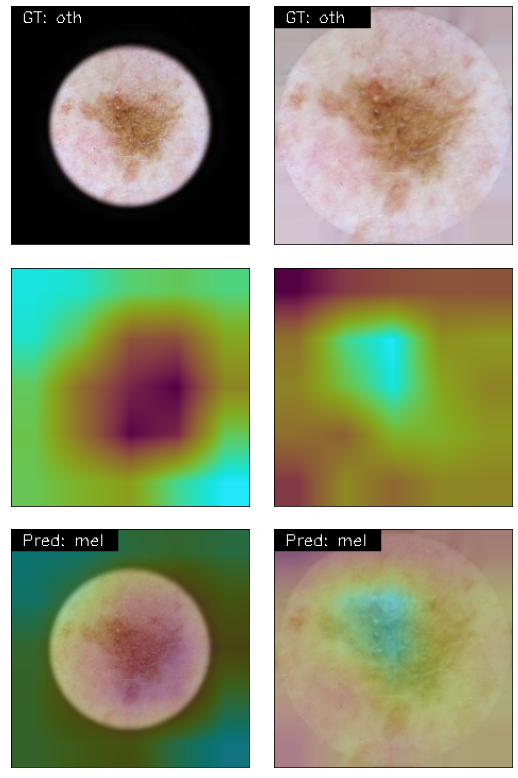

In [364]:
fig, axes = plt.subplots(3, 2, figsize = (9,14));

axes[0][0].imshow(orig_image);
axes[1][0].imshow(orig_heatmap);
axes[2][0].imshow(orig_output);

axes[0][1].imshow(ns_image);
axes[1][1].imshow(ns_heatmap);
axes[2][1].imshow(ns_output);



for row in axes:
    for ax in row:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    
plt.subplots_adjust(wspace=0.1, hspace = 0.1)

plt.imsave

In [104]:
print(orig_i, ns_i)

0 0


In [365]:
fig.savefig(r'D:\OneDrive - MMU\Journal_Project\temp\saved_figs\gradcam_14_gt_oth_pred_mel.png')